In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.applications.resnet import ResNet50
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

**Loading and Pre-processing the training data**

In [2]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/225, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)
train_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/MP-2/Dataset/Train",target_size = (256,256), batch_size = 64,
                                               class_mode = "categorical")

Found 12000 images belonging to 3 classes.


In [3]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**Loading and Pre-processing the testing data**

In [4]:
test_datagen = image.ImageDataGenerator(rescale = 1./225)
test_data = test_datagen.flow_from_directory(directory = "/content/drive/MyDrive/MP-2/Dataset/Test",target_size = (256,256), batch_size = 64,
                                               class_mode = "categorical")

Found 3000 images belonging to 3 classes.


In [5]:
test_data.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**Importing CNN Model**

In [6]:
res = ResNet50( input_shape=(256,256,3), include_top= False) # include_top will consider the new weights

In [7]:
for layer in res.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [8]:
x = Flatten()(res.output)
x = Dense(units=3 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model2 = Model(res.input, x)

In [9]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model2.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.001, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/MP-2/resnet50", monitor="val_accuracy", verbose=1, save_best_only= True)

In [12]:
model2.fit_generator(train_data, epochs= 10, validation_data= test_data, callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
188/188 [==============================] - ETA: 0s - loss: 1.7143 - accuracy: 0.5691
Epoch 1: val_accuracy improved from -inf to 0.48700, saving model to /content/drive/MyDrive/MP-2/resnet50
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MP-2/resnet50/assets
188/188 [==============================] - 508s 3s/step - loss: 1.7143 - accuracy: 0.5691 - val_loss: 1.0790 - val_accuracy: 0.4870
Epoch 2/10
188/188 [==============================] - ETA: 0s - loss: 0.7731 - accuracy: 0.6824
Epoch 2: val_accuracy improved from 0.48700 to 0.74500, saving model to /content/drive/MyDrive/MP-2/resnet50
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MP-2/resnet50/assets
188/188 [==============================] - 313s 2s/step - loss: 0.7731 - accuracy: 0.6824 - val_loss: 0.5877 - val_accuracy: 0.7450
Epoch 3/10
188/188 [==============================] - ETA: 0s - loss: 0.7894 - accuracy: 0.7036
Epoch 3: val_accuracy did not improve from 0.74500
188/188 [===============

In [13]:
path = "/content/drive/MyDrive/MP-2/test/normal (2).jpeg"
#/content/drive/MyDrive/MP-2/New/Covid19-dataset/test/Covid/098.jpeg
#/content/drive/MyDrive/MP-2/New/Covid19-dataset/test/Normal/0107.jpeg
#/content/drive/MyDrive/MP-2/New/Covid19-dataset/test/Viral Pneumonia/0115.jpeg
img = image.load_img(path,target_size=(256,256,3))
img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [14]:
#load only best model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/MP-2/resnet50")
print(model.predict(img))
np.argmax(model.predict(img))

[[0.98351604 0.998553   0.8287942 ]]


1

In [15]:
model2.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

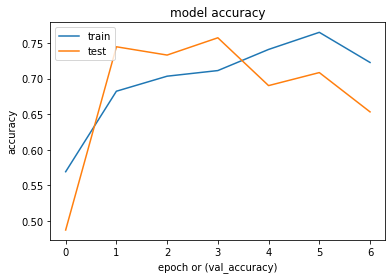

In [16]:
#summarize model for accuracy
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch or (val_accuracy)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

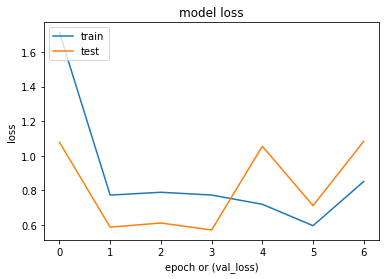

In [17]:
#summarize history for loss
plt.plot(model2.history.history['loss'])
plt.plot(model2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch or (val_loss)')
plt.legend(['train','test'],loc = 'upper left')
plt.show()